# 모듈 불러오기

In [29]:
import warnings
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# 차트 설정 
sns.set(font = "malgun gothic", rc = {'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize = (10,8))
warnings.filterwarnings('ignore')


%matplotlib inline

# 스케일링
from sklearn.preprocessing import MinMaxScaler
# train, test 분리
from sklearn.model_selection import train_test_split
# 규제
from sklearn.linear_model import Ridge, Lasso
# 시계열 시각화
from sktime.utils.plotting import plot_series
# 분석할 기간 설정
from sktime.forecasting.base import ForecastingHorizon

# 시계열 예측
from sktime.forecasting.naive import NaiveForecaster

# score
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 계절성 분석
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [5]:
mos = pd.read_csv('C:\\k_disital\\source\\mygit\\ML-First-Project\\mosquito_Indicator.csv')

In [6]:
mos

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [4]:
# 모기지수 : 일 평균 모기 개체수

# 데이터 탐색 EDA

In [5]:
mos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1342 non-null   object 
 1   mosquito_Indicator  1342 non-null   float64
 2   rain(mm)            1342 non-null   float64
 3   mean_T(℃)           1342 non-null   float64
 4   min_T(℃)            1342 non-null   float64
 5   max_T(℃)            1342 non-null   float64
dtypes: float64(5), object(1)
memory usage: 63.0+ KB


In [6]:
mos.keys()

Index(['date', 'mosquito_Indicator', 'rain(mm)', 'mean_T(℃)', 'min_T(℃)',
       'max_T(℃)'],
      dtype='object')

In [7]:
mos['mosquito_Indicator'].describe()

count    1342.000000
mean      251.991803
std       295.871336
min         0.000000
25%         5.500000
50%        91.900000
75%       480.400000
max      1000.000000
Name: mosquito_Indicator, dtype: float64

## 데이터 시각화

In [9]:
def plot_hist(df):
    plt.rcParams['figure.figsize'] = [20,16]
    fig = plt.figure()
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(3,2,i+1) # 5행5열에서 i+1번째 #ax : 축
        plt.hist(df[df.columns[i]],bins = 50)
        ax.set_title(df.columns[i])
    plt.show()

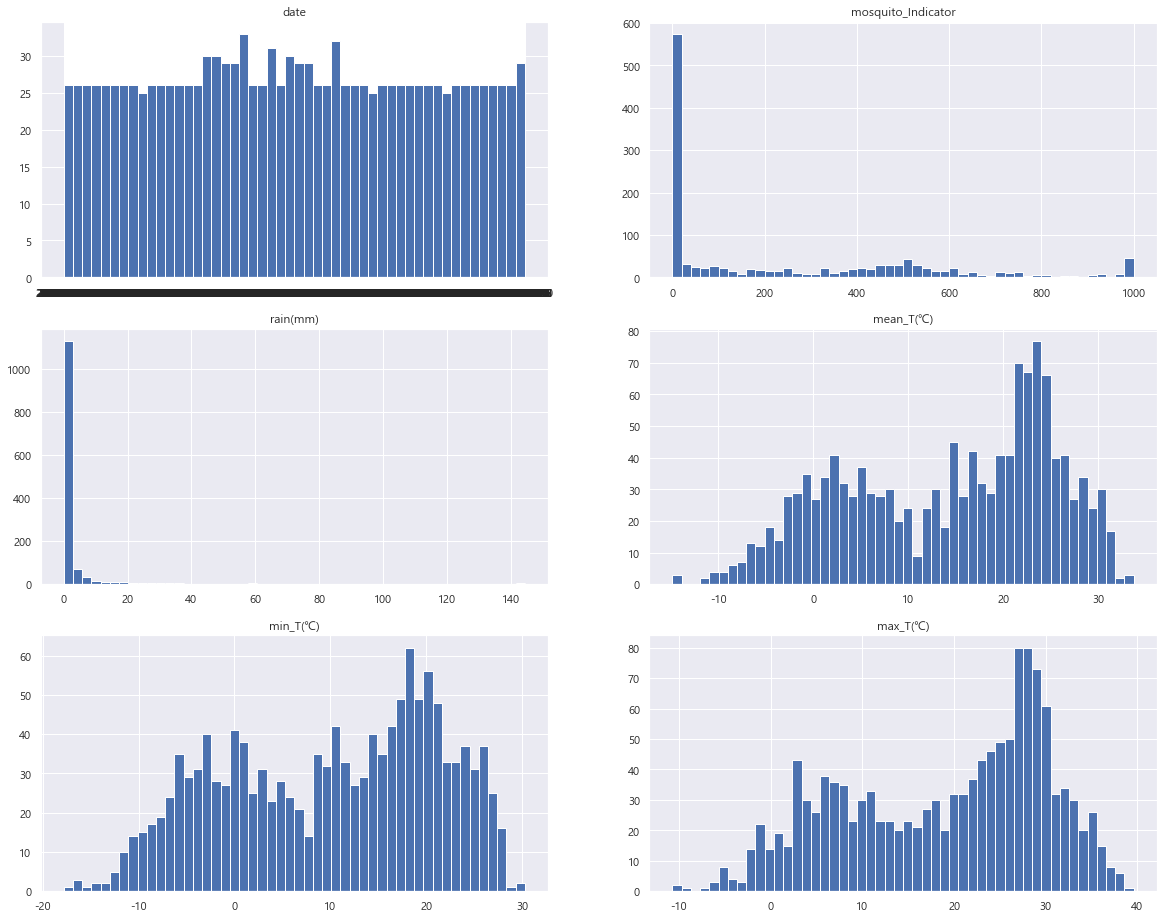

In [10]:
plot_hist(mos)

# 데이터 전처리

## 중복된 데이터 제거

In [7]:
mos.date.is_unique

False

In [8]:
print(mos.date.count())
print(mos.date.nunique())

1342
1295


In [9]:
mos.drop_duplicates(subset='date',ignore_index=True,inplace=True) ### 중복된거 지우는거임

#ignore_index=True : 인데스도 같이 수정

In [10]:
mos.date.is_unique

True

In [11]:
print(mos.date.count())
print(mos.date.nunique())

1295
1295


## object → datetime로 변경

In [12]:
mos['date'] = pd.to_datetime(mos['date'])

In [17]:
mos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1295 non-null   datetime64[ns]
 1   mosquito_Indicator  1295 non-null   float64       
 2   rain(mm)            1295 non-null   float64       
 3   mean_T(℃)           1295 non-null   float64       
 4   min_T(℃)            1295 non-null   float64       
 5   max_T(℃)            1295 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 60.8 KB


## 스케일링

In [13]:
data = mos.drop(['mosquito_Indicator', 'date'],axis = 1)
target = mos['mosquito_Indicator']

In [19]:
data

,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,0.0,18.8,12.2,26.0
1,16.5,21.1,16.5,28.4
2,27.0,12.9,8.9,17.6
3,0.0,15.7,10.2,20.6
4,7.5,18.9,10.2,26.9
...,...,...,...,...
1290,0.0,-1.7,-4.6,2.6
1291,0.0,1.1,-3.6,6.1
1292,1.4,3.8,1.1,6.2
1293,0.4,2.7,-5.7,6.8


In [20]:
target

0       254.4
1       273.5
2       304.0
3       256.2
4       243.8
        ...  
1290      5.5
1291      5.5
1292      5.5
1293      5.5
1294      5.5
Name: mosquito_Indicator, Length: 1295, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled = sc.fit_transform(data)

# train, test 나누기

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, target, test_size = 0.2, random_state = 1121)

# 회귀분석 - LinearRegression

In [23]:
# fit, predict
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)   

In [24]:
# score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, pred) 

print('MAE: {0:.3f}, MSE: {1: .3f}, RMSE: {2: .3f}, R2:{3:.3f}'.format(mae, mse, rmse, r2))

MAE: 152.494, MSE:  39084.151, RMSE:  197.697, R2:0.545


In [25]:
print(lr.score(X_train,y_train))
print(lr.score(X_test, y_test))

0.561818520440136
0.5453776460188773


## 다중회귀_2차

In [26]:
# 사이킷런 변환기_2차
## train과 test의 점수차를 줄일 수 있을 수도 있어 사이킷런 변환기 사용
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree= 2, include_bias = False) # 절편 개수(1을 제거)

#poly.fit(X_train)
train_poly = poly.fit_transform(X_train)
test_poly = poly.transform(X_test)

poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2']

In [27]:
# score
lr.fit(train_poly,y_train)
pred = lr.predict(test_poly)
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.6013579279220858
0.4889815298922211


- train score와 test score 가 차이가 벌러져 과대적합이 발생했다고 판단 → 규제를 통해서 과대적합을 줄이기

### 릿지 규제

In [28]:
ridge = Ridge()

ridge.fit(X_train, y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.5584720652391784
0.5453594913007357


In [29]:
from sklearn.linear_model import Ridge, Lasso
# 훈련세트와 테스트세트의 정수가 가장 가까운 지점이 최적의 alpha 값이 된다
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #릿지모델
    ridge = Ridge(alpha = alpha)
    #릿지모델 훈련
    ridge.fit(X_train, y_train)
    train_score.append(ridge.score(X_train, y_train))
    test_score.append(ridge.score(X_test,y_test))

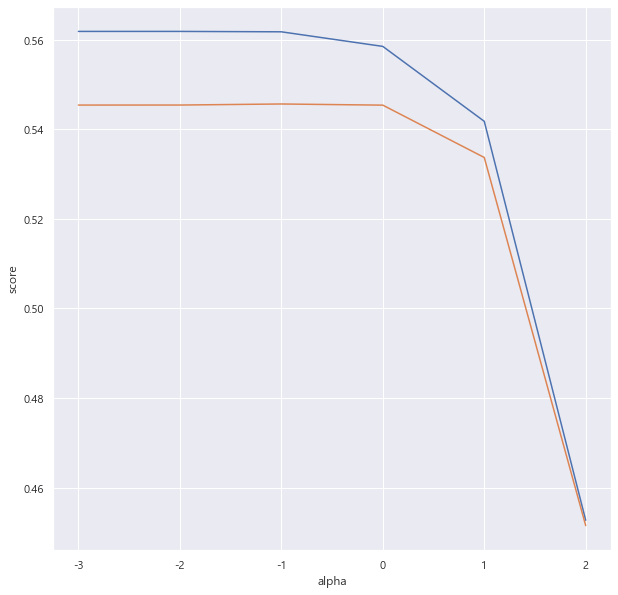

In [30]:
# 시각화
plt.figure(figsize=(10,10))
plt.plot(np.log10(alpha_list), train_score) # 로그로 안 보면 크기가 너무 크다.
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

- score가 높은 것 중에 폭이 좁은게 -1(0.1)과 0(1)
- 점수는 낮지만 폭이 좁은건 1(10)

In [31]:
# alpha가 10(1)
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.5417508701720717
0.5336737589918069


In [32]:
# alpha가 1 (0)
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.5584720652391784
0.5453594913007357


In [33]:
# alpha가 0.1 (-1)
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.5617292087395449
0.5456175742772317


- 알파값이 0.1(-1)일때가 예측값이 높고, 과대적합이 가장 최소화 되는 구간
- 과대적합이 조금 더 !! 이거 는 물어보고 쓰자 어떤 알파값이 최적의 갑인지 판단을 못하겟음

### 라쏘규제

In [34]:
lasso = Lasso()

lasso.fit(X_train, y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.555959291121928
0.5419116036324951


In [35]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #라쏘모델
    lasso = Lasso(alpha = alpha)
    #릿지모델 훈련
    lasso.fit(X_train, y_train)
    #결정계수(R2 score)
    train_score.append(lasso.score(X_train,y_train))
    test_score.append(lasso.score(X_test,y_test))

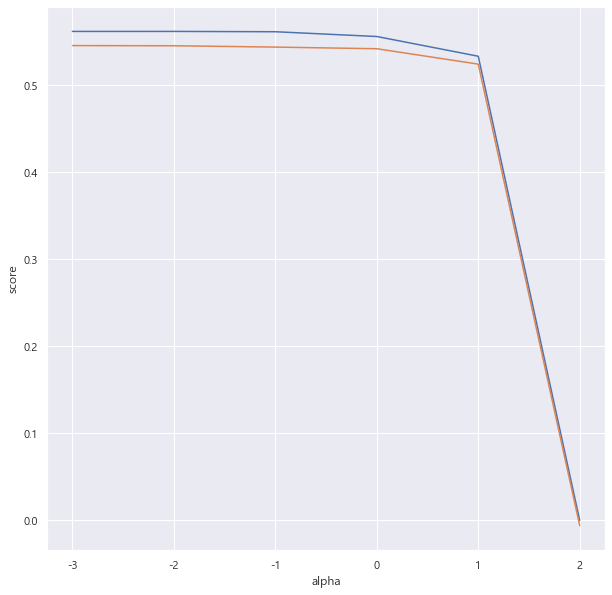

In [36]:
# 시각화
plt.figure(figsize=(10,10))
plt.plot(np.log10(alpha_list), train_score) # 로그로 안 보면 크기가 너무 크다.
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

- score가 높은 것 중에 폭이 좁은게 -1(0.1)과 0(1)
- 점수는 낮지만 폭이 좁은건 1(10)

In [37]:
# 알파값 10
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.5332946185403951
0.5242197770735639


In [38]:
# 알파값 1
lasso = Lasso(alpha = 1)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.555959291121928
0.5419116036324951


In [39]:
# 알파값 0.1
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.5614372438900941
0.5437997463207276


- 편차가 있지만 조금이라 확률이 높은걸 선택
- 릿지가 미세하게 좋은 결과값이 나옴<br>

릿지 alpha : -1 <br>
0.5617292087395449<br>
0.5456175742772317<br>
<br>
라쏘 alpha : 0.1<br>
0.5614372438900941<br>
0.5437997463207276<br>



- 기존 score
0.561818520440136 <br>
0.5453776460188773

<br> => 다중회귀를 하여 규제를 준 값보다 기존의 값이 조금더 좋다.

# 시계열 분석- sktime

In [40]:
# #넘파이 버전 낮추기
# !pip install numpy==1.20.3

In [15]:
print(np.__version__)

1.20.3


In [42]:
#_centered 이게 미리 설치 되어 있어서 충돌이 일어나 모듈 import가 안되서 함수로 따로 만듬
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

## 데이터셋 세팅

### 전처리 완료된 데이터를 가지고 시계열 df 만들기

In [16]:
mos_scaled = pd.DataFrame(scaled, columns=data.columns)
mos_scaled['date'] = mos.date
mos_scaled['Indi'] = target
mos_scaled


,rain(mm),mean_T(℃),min_T(℃),max_T(℃),date,Indi
0,0.000000,0.692784,0.623701,0.729622,2016-05-01,254.4
1,0.114187,0.740206,0.713098,0.777336,2016-05-02,273.5
2,0.186851,0.571134,0.555094,0.562624,2016-05-03,304.0
3,0.000000,0.628866,0.582121,0.622266,2016-05-04,256.2
4,0.051903,0.694845,0.582121,0.747515,2016-05-05,243.8
...,...,...,...,...,...,...
1290,0.000000,0.270103,0.274428,0.264414,2019-12-27,5.5
1291,0.000000,0.327835,0.295218,0.333996,2019-12-28,5.5
1292,0.009689,0.383505,0.392931,0.335984,2019-12-29,5.5
1293,0.002768,0.360825,0.251559,0.347913,2019-12-30,5.5


In [44]:
mos_scaled.date

0      2016-05-01
1      2016-05-02
2      2016-05-03
3      2016-05-04
4      2016-05-05
          ...    
1290   2019-12-27
1291   2019-12-28
1292   2019-12-29
1293   2019-12-30
1294   2019-12-31
Name: date, Length: 1295, dtype: datetime64[ns]

In [17]:
mos_p = mos_scaled[['date', 'Indi']]
mos_p = mos_p.set_index('date')

In [46]:
mos_p.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
               '2016-05-09', '2016-05-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=1295, freq=None)

In [18]:
# freq= D 로 만들기
mos_p.index= mos_p.index.to_period(freq = 'D')

### 시각화

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

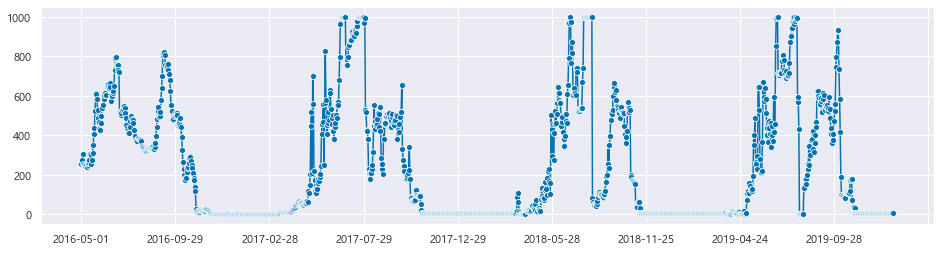

In [19]:
plot_series(mos_p)

## NaiveForecaster
- 과거의 추세가 계속되고 있다는 가정을 기반으로 예측

In [20]:
# step 1: 데이터 세팅
y = mos_p

# step 2: 예측할 기간 설정 ( 2년)
fh = np.arange(1, 732)

# step 3: 시계열 알고리즘 인스턴트 생성 (1년 단위)
forecaster = NaiveForecaster(strategy="mean", sp=365)
# strategy: 'mean': 평균값으로 예측 
# sp : 주기성(기간)

# step 4: 학습
forecaster.fit(y, fh=fh)

# step 5: 연습
y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

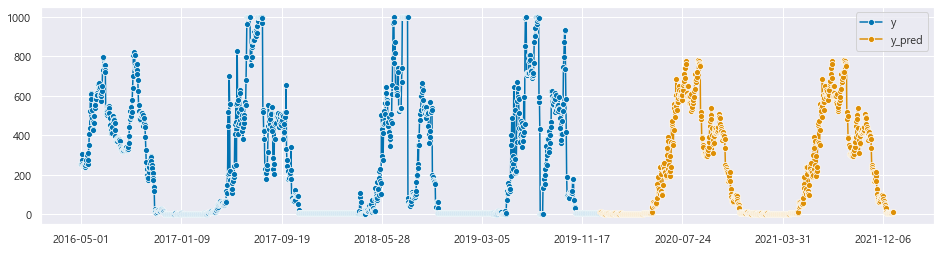

In [21]:
# 시각화
plot_series(y, y_pred, labels=["y", "y_pred"])

### train, test 나눈 후 학습

In [22]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, test_size=0.25)

In [52]:
# 데이터 학습

# step 1: y_test.index 의 인덱스를 가지고 기간 설정하기
fh = ForecastingHorizon(y_test.index, is_relative=False)

# step 2: 알고리즘 인스턴트 생성
forecaster = NaiveForecaster(strategy="mean", sp=365)

# step 3: 학습
forecaster.fit(y_train)

# step 4: 연습
y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

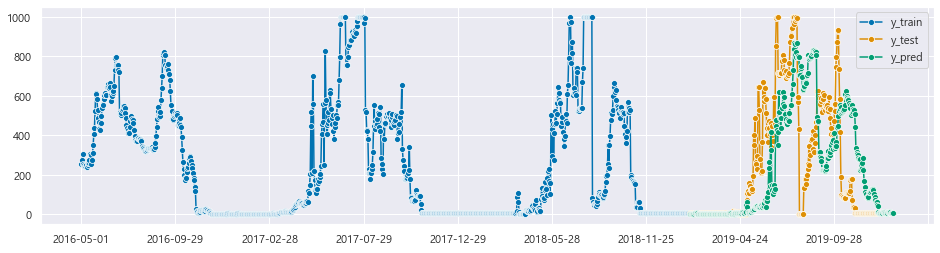

In [43]:
# 시각화
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

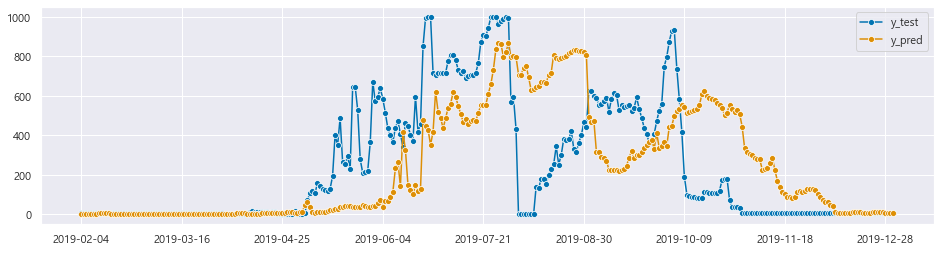

In [39]:
plot_series( y_test, y_pred, labels=[ "y_test", "y_pred"])

### score

In [44]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MAE: {0:.3f}, MSE: {1: .3f}, RMSE: {2: .3f}, R2:{3:.3f}'.format(mae, mse, rmse, r2))

MAE: 196.701, MSE:  77149.950, RMSE:  277.759, R2:0.162


In [45]:
mape = MeanAbsolutePercentageError()
mape.get_tag("lower_is_better")
# 작을수로 좋은 값

True

In [53]:
mean_absolute_percentage_error(y_test, y_pred,symmetric=True)

0.9399354235442909

### 패턴
- 시계열 패턴 : 추세(trend), 계절성(seasonality), 주기(cycle) 이렇게 세 가지 시계열 패턴
- 해마다 어떤 특정한 때나 1주일마다 특정 요일에 나타나는 것 같은 계절성 요인이 시계열에 영향을 줄 때 계절성(seasonality) 패턴이 나타납니다.

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

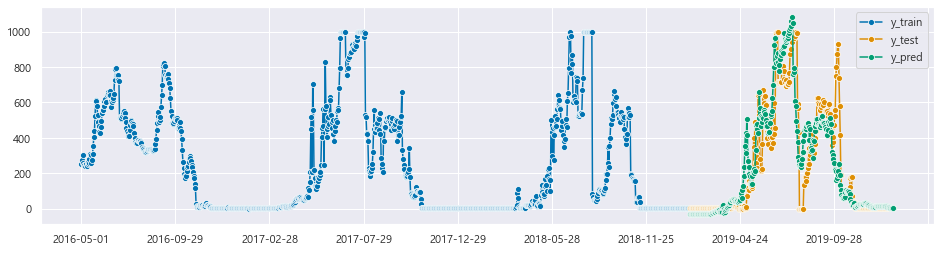

In [57]:
forecaster = ExponentialSmoothing(seasonal="add", sp=365)
# sktime에서는 주기(cycle)는 사용할 수 없음

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])


In [58]:
mean_absolute_error(y_test, y_pred)

103.35702601911342

In [59]:
mean_absolute_percentage_error(y_test, y_pred,symmetric=True)

0.9103210326168167

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

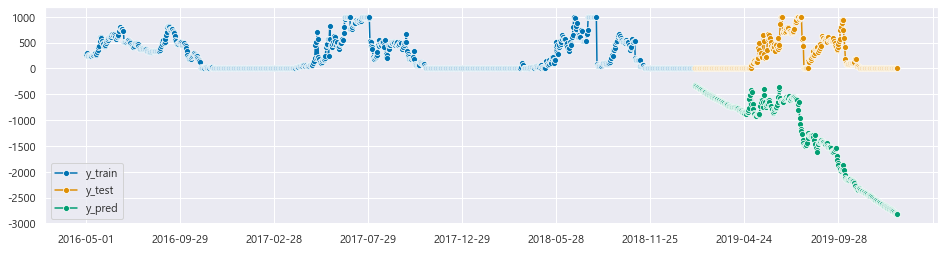

In [64]:
forecaster = ExponentialSmoothing( trend= 'add',seasonal="add", sp=365)
# sktime에서는 주기(cycle)는 사용할 수 없음

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])


In [61]:
mean_absolute_error(y_test, y_pred)

1560.9732758493494

In [62]:
mean_absolute_percentage_error(y_test, y_pred,symmetric=True)

2.0